<a href="https://colab.research.google.com/github/eiport/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
sns.set(rc={'figure.figsize':(5,5)})

## **What model did you use and why?**

# Logistic Regression
In statistics, the logistic model is a binary classifier used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. **Like in our Titanic dataset, we want to know if they survived or not.**


In [ ]:
data_df = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/titanic_train_demo.csv')
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data_df['Gender'] = data_df['Sex'].map({'female': 1, 'male': 0})
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<Axes: >

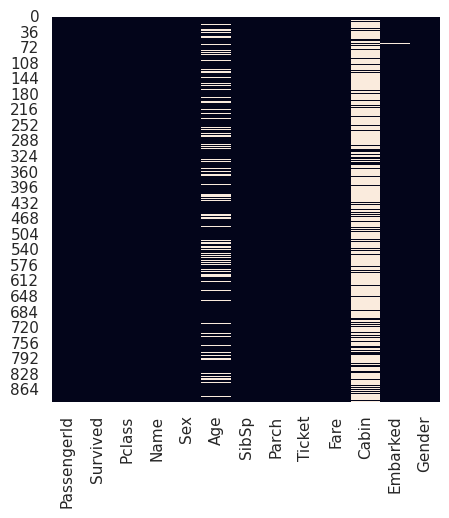

In [ ]:
#now, we are checking start with a pairplot, and check for missing values
sns.heatmap(data_df.isnull(),cbar=False)

As we see above, Age and Cabin column have lots of missing values. But, age column is important data for explorary data analysis. Thus, we get the median of data.

In [ ]:
#Data Cleaning and Data Drop Process
data_df['Fare'] = data_df['Fare'].fillna(data_df['Fare'].dropna().median())
data_df['Age'] = data_df['Age'].fillna(data_df['Age'].dropna().median())

# instead of nan values
data_df['Embarked']=data_df['Embarked'].fillna('S')
# Change to categoric column to numeric
data_df.loc[data_df['Embarked']=='S','Embarked']=0
data_df.loc[data_df['Embarked']=='C','Embarked']=1
data_df.loc[data_df['Embarked']=='Q','Embarked']=2

In [ ]:
# S=Southampton, C=Cherbourg; Q=Queenstown

In [ ]:
#Drop unnecessary columns
drop_elements = ['Name','Cabin','Ticket','Sex']
data_df = data_df.drop(drop_elements, axis=1)

In [ ]:
data_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,1,0,3,22.0,1,0,7.2500,0,0
1,2,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,26.0,0,0,7.9250,0,1
3,4,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,35.0,0,0,8.0500,0,0


<ipython-input-12-fac17b68be2a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<Axes: >

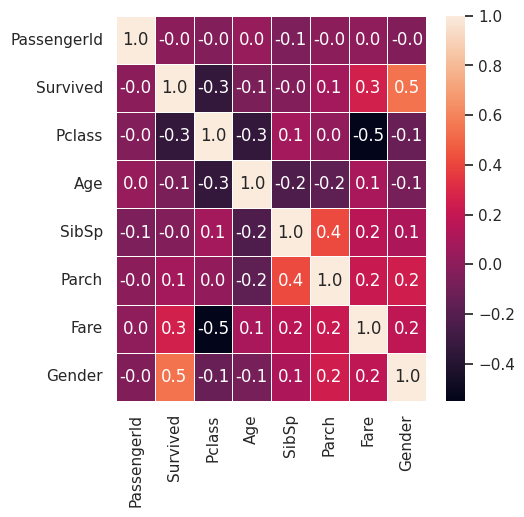

In [ ]:
#heatmap for train dataset
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<Axes: >

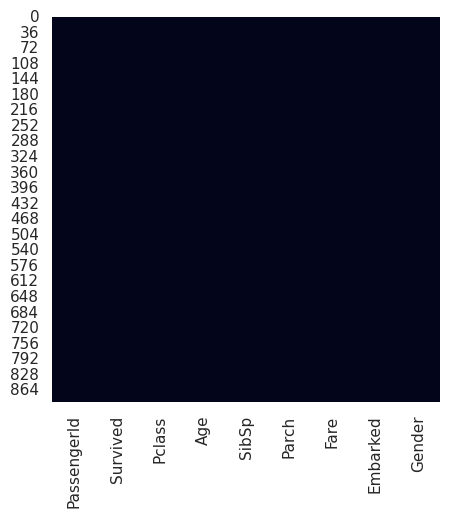

In [ ]:
# Now, data is clean and read to a analyze
sns.heatmap(data_df.isnull(),cbar=False)

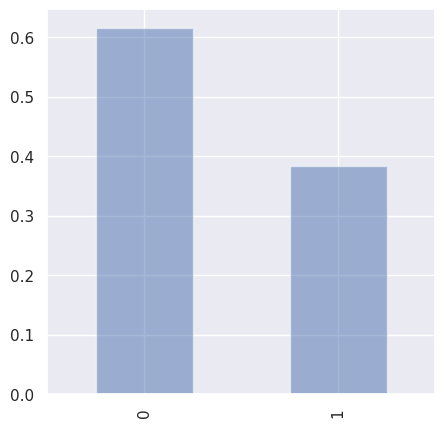

In [ ]:
import matplotlib.pyplot as plt
# how many people survived or not... %60 percent died %40 percent survived
fig = plt.figure(figsize=(5,5))
data_df.Survived.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

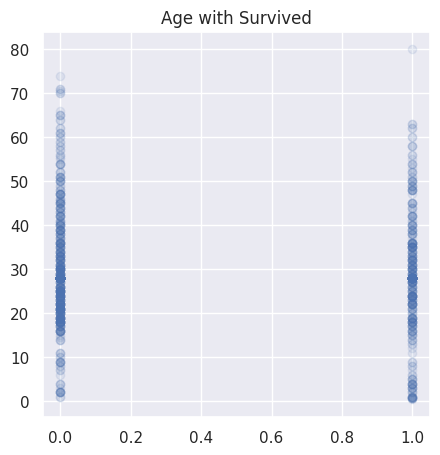

In [ ]:
#Age with survived
plt.scatter(data_df.Survived, data_df.Age, alpha=0.1)
plt.title("Age with Survived")
plt.show()

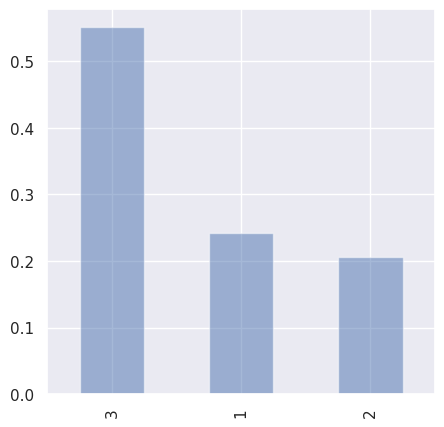

In [ ]:
#Count the passenger class
fig = plt.figure(figsize=(5,5))
data_df.Pclass.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.show()

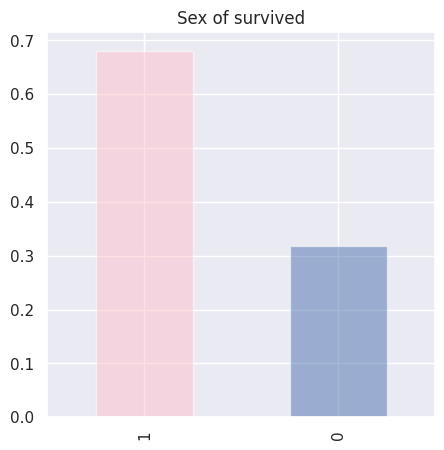

In [ ]:
#Women Men together graph
female_color='pink'
data_df.Gender[data_df.Survived==1].value_counts(normalize=True).plot(kind='bar', alpha=0.5,color=[female_color,'b'])
plt.title("Sex of survived")
plt.show()

In [ ]:
# which columns we have
data_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Gender'],
      dtype='object')

<ipython-input-19-40e47ed49465>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')
<ipython-input-19-40e47ed49465>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df[data_df['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='

Text(0.5, 1.0, 'Survival Rate by Embarked')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 72.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 86.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


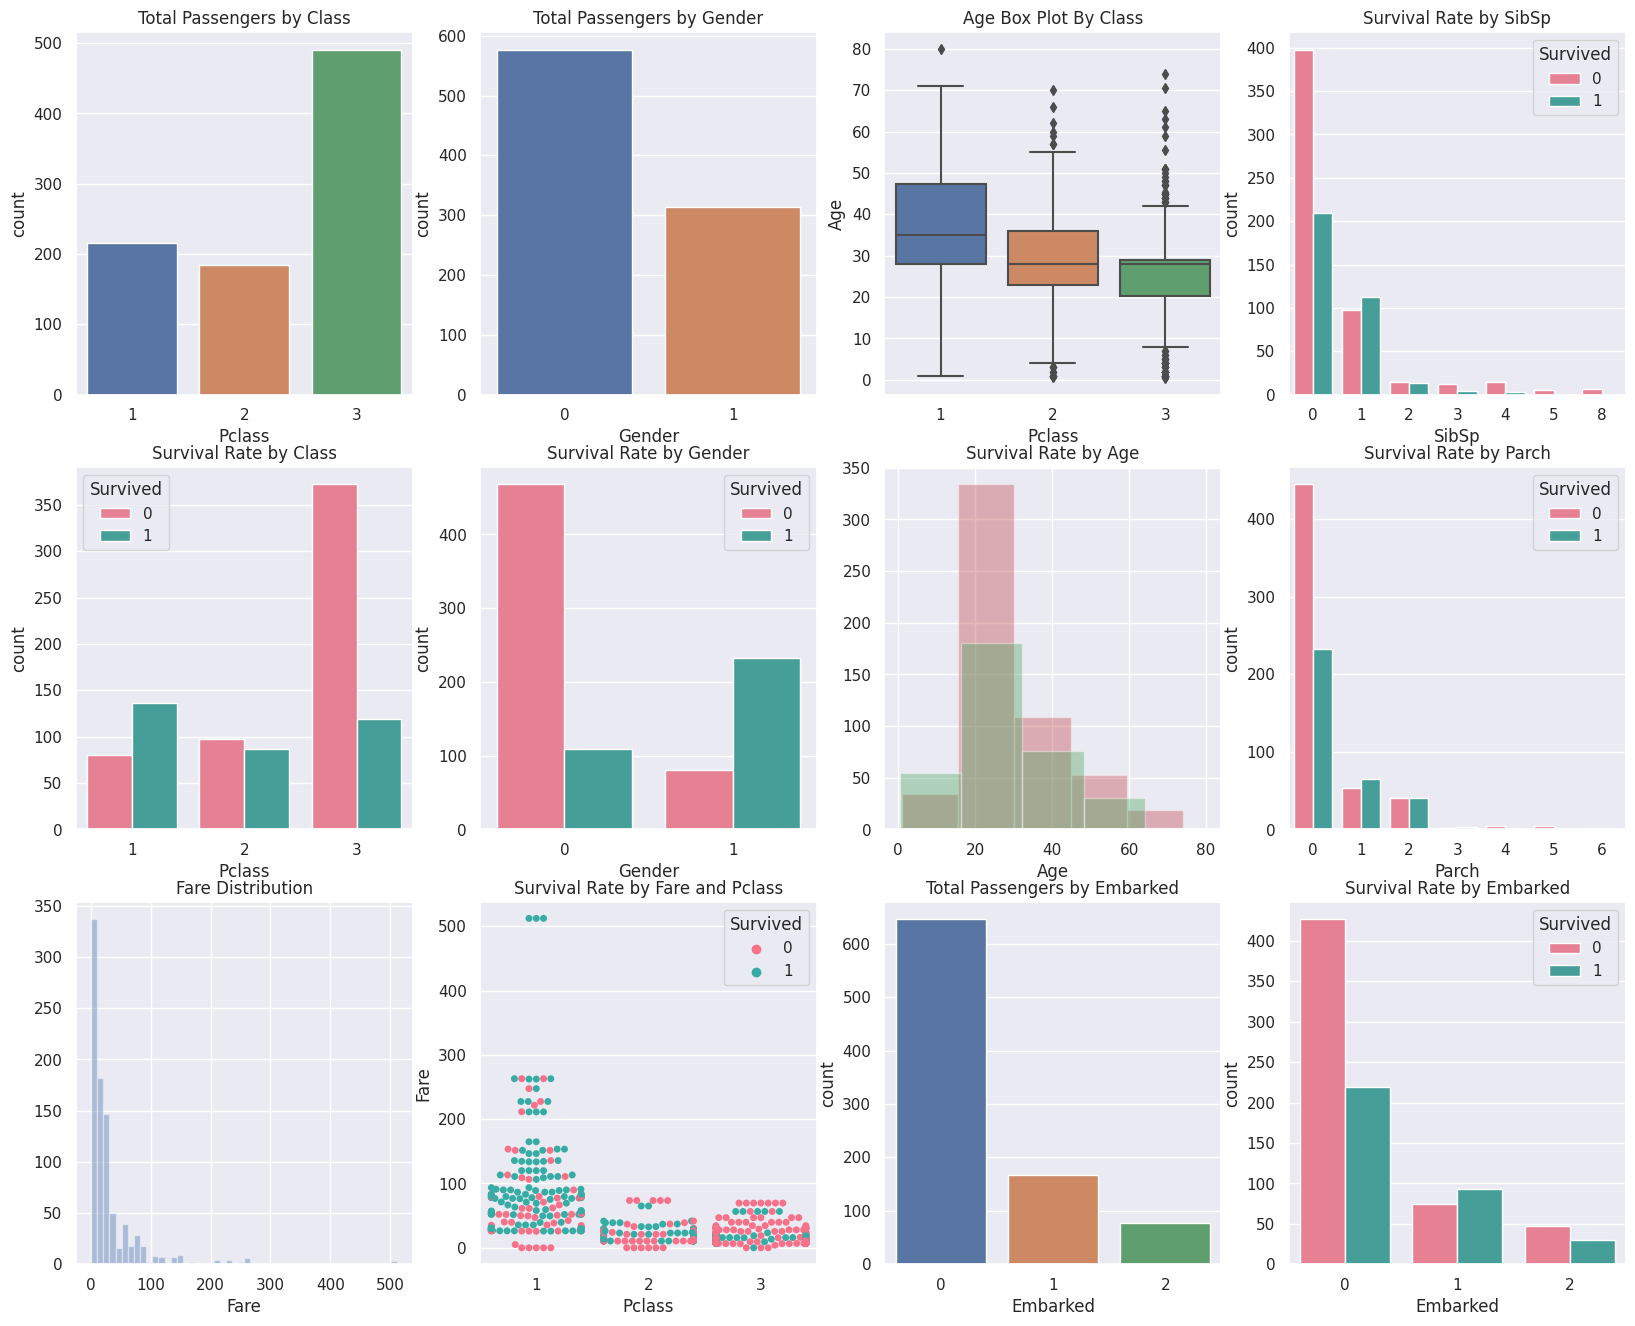

In [ ]:
f,ax = plt.subplots(3,4,figsize=(20,16))
sns.countplot(x='Pclass',data=data_df,ax=ax[0,0])
sns.countplot(x='Gender',data=data_df,ax=ax[0,1])
sns.countplot(x='Gender',hue='Survived',data=data_df,ax=ax[1,1],palette='husl')
ax[0,1].set_title('Total Passengers by Gender')


sns.boxplot(x='Pclass',y='Age',data=data_df,ax=ax[0,2])
sns.countplot(x='SibSp',hue='Survived',data=data_df,ax=ax[0,3],palette='husl')
sns.distplot(data_df['Fare'].dropna(),ax=ax[2,0],kde=False,color='b')
sns.countplot(x='Embarked',data=data_df,ax=ax[2,2])

sns.countplot(x='Pclass',hue='Survived',data=data_df,ax=ax[1,0],palette='husl')
sns.countplot(x='Gender',hue='Survived',data=data_df,ax=ax[1,1],palette='husl')
sns.distplot(data_df[data_df['Survived']==0]['Age'].dropna(),ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(data_df[data_df['Survived']==1]['Age'].dropna(),ax=ax[1,2],kde=False,color='g',bins=5)
sns.countplot(x='Parch',hue='Survived',data=data_df,ax=ax[1,3],palette='husl')
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=data_df,palette='husl',ax=ax[2,1])
sns.countplot(x='Embarked',hue='Survived',data=data_df,ax=ax[2,3],palette='husl')

ax[0,0].set_title('Total Passengers by Class')
ax[0,1].set_title('Total Passengers by Gender')
ax[0,2].set_title('Age Box Plot By Class')
ax[0,3].set_title('Survival Rate by SibSp')
ax[1,0].set_title('Survival Rate by Class')
ax[1,1].set_title('Survival Rate by Gender')
ax[1,2].set_title('Survival Rate by Age')
ax[1,3].set_title('Survival Rate by Parch')
ax[2,0].set_title('Fare Distribution')
ax[2,1].set_title('Survival Rate by Fare and Pclass')
ax[2,2].set_title('Total Passengers by Embarked')
ax[2,3].set_title('Survival Rate by Embarked')

# **Select From Model**

Feature 0: 0.257155
Feature 1: 81.591446
Feature 2: 2.723676
Feature 3: 0.284663
Feature 4: 10.240861
Feature 5: 45.280666
Feature 6: 8.847155
Feature 7: 287.134550


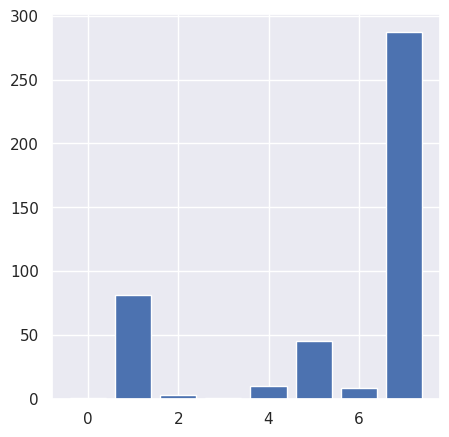

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

  # load the dataset
X = data_df.drop("Survived",axis=1)
y = data_df["Survived"]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Based on the graph:

feature 7: Gender

feature 1: Pclass

feature 5: Fare

*********************
feature 4: Parch

feature 6: Embarked

feature 2: Age

In [ ]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold

mdlsel = VarianceThreshold(threshold=0.5)
mdlsel.fit(data_df)
ix = mdlsel.get_support()
#data1 = mdlsel.transform(data_df)
data1 = pd.DataFrame(mdlsel.transform(data_df), columns = data_df.columns.values[ix])
data1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.25
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.925
3,4,1,35.0,1,0,53.1
4,5,3,35.0,0,0,8.05


In [ ]:
#Select From Model for Logistic Regression

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

X = data_df.drop("Survived",axis=1)
y = data_df["Survived"]

# Linear Model
linmdl = LogisticRegression()
linmdl.fit(X,y)
mdl = SelectFromModel(linmdl,prefit=True)
ix = mdl.get_support()
data3 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix])
data3.head(n=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,Pclass,Gender
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0


In [ ]:
#Select K Best
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data_df.drop("Survived",axis=1)
y = data_df["Survived"]

mdlsel = SelectKBest(chi2, k=5)
mdlsel.fit(X,y)
ix = mdlsel.get_support()
data2 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix]) # en iyi leri aldi... 7 tane...
data2.head(n=5)

,Pclass,Age,Fare,Embarked,Gender
0,3,22.0,7.25,0,0
1,1,38.0,71.2833,1,1
2,3,26.0,7.925,0,1
3,1,35.0,53.1,0,1
4,3,35.0,8.05,0,0


In [ ]:
#Recursive Feature Selection

from sklearn.feature_selection import RFE

mdl = RFE(linmdl,n_features_to_select=5)
mdl.fit(X,y)
ix = mdl.get_support()

data4 = pd.DataFrame(mdl.transform(X), columns = X.columns.values[ix])
data4.head(n=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Pclass,SibSp,Parch,Embarked,Gender
0,3,1,0,0,0
1,1,1,0,1,1
2,3,0,0,0,1
3,1,1,0,0,1
4,3,0,0,0,0


### Dataset Description  

We want to predict if the person survived the Titanic:

- Pclass
- Gender

In [ ]:
# write list of features we want to use
#features = ['PassengerId','Pclass','Age','SibSp','Parch','Fare','Embarked','Gender']
features = ['Pclass','Embarked','Gender']
# feature engingeering to be discussed in next class
# Set X
X = data_df[features]
# Set y
y = data_df["Survived"]
from sklearn.model_selection import train_test_split # split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


from sklearn.linear_model import LogisticRegression # linear model for classification

# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)

In [ ]:
# feature importance
log_reg.coef_

array([[-0.87566028,  0.37788723,  2.40317015]])


The first score (0.000533) corresponds to the importance of the first feature.
**Pclass The second score (-0.676235) corresponds to the importance of the second feature.**
The third score (-0.022301) corresponds to the importance of the third feature.
The fourth score (-0.236269) corresponds to the importance of the fourth feature.
The fifth score (-0.134753) corresponds to the importance of the fifth feature.
The sixth score (0.005579) corresponds to the importance of the sixth feature.
**Embarked The seventh score (0.332252) corresponds to the importance of the seventh feature.**
**Age: The eighth score (2.515926) corresponds to the importance of the eighth feature.**

### What is a Confusion Matrix?  
A confusion matrix is a summary of prediction results on a classification problem.  

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.  

The confusion matrix shows the ways in which your classification model is confused when it makes predictions.  

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.  

It is this breakdown that overcomes the limitation of using classification accuracy alone.  

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[134,  23],
       [ 33,  78]])

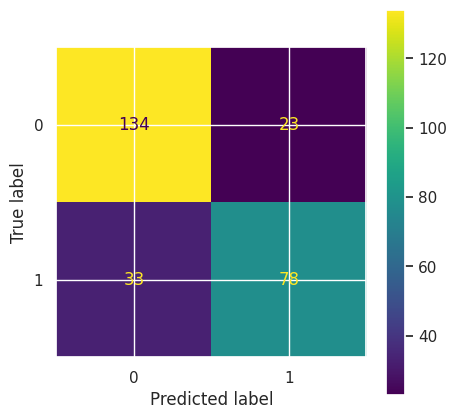

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=log_reg.classes_)

disp.plot()
plt.show()

In [ ]:
sklearn.metrics.log_loss(y_train, y_pred)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#input and output
target = data_df['Survived']
features = data_df[['Pclass','Gender','SibSp','Parch','Age']]

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)


classifier = linear_model.LogisticRegression()
classifier_ = classifier.fit(X_train,y_train)
target_predict=classifier_.predict(X_test)


print("Logistic Regression Score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

Logistic Regression Score:  0.8246268656716418
MSE    : 0.17537313432835822
R2     : 0.27721351925173576


In [ ]:
#Polynomial Features

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)
poly = preprocessing.PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(features)

classifier_ = classifier.fit(X_train,y_train)
print("Polynomial Features: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

Polynomial Features:  0.8246268656716418
MSE    : 0.17537313432835822
R2     : 0.27721351925173576


In [ ]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

target = data_df['Survived'].values
data_features_names = ['Pclass','Gender','SibSp','Parch','Fare','Embarked','Age']
features = data_df[data_features_names].values

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

my_forest = RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=500, random_state=5,criterion = 'entropy')


my_forest_ = my_forest.fit(X_train,y_train)
target_predict=my_forest_.predict(X_test)

print("Random forest score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

Random forest score:  0.8171641791044776
MSE    : 0.1828358208955224
R2     : 0.2464566477305331


In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

target = data_df['Survived'].values
data_features_names = ['Pclass','Gender','SibSp','Parch','Fare','Embarked','Age']
features = data_df[data_features_names].values

#Build test and training test
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

decision_tree = tree.DecisionTreeClassifier(random_state=1,criterion = 'entropy',min_samples_split = 100)


decision_tree_ = decision_tree.fit(X_train,y_train)
target_predict=decision_tree_.predict(X_test)

print("Decision tree score: ",accuracy_score(y_test,target_predict))

from sklearn.metrics import mean_squared_error, r2_score
print ("MSE    :",mean_squared_error(y_test,target_predict))
print ("R2     :",r2_score(y_test,target_predict))

Decision tree score:  0.8134328358208955
MSE    : 0.1865671641791045
R2     : 0.23107821196993172


Generalized tree score:  0.8406285072951739


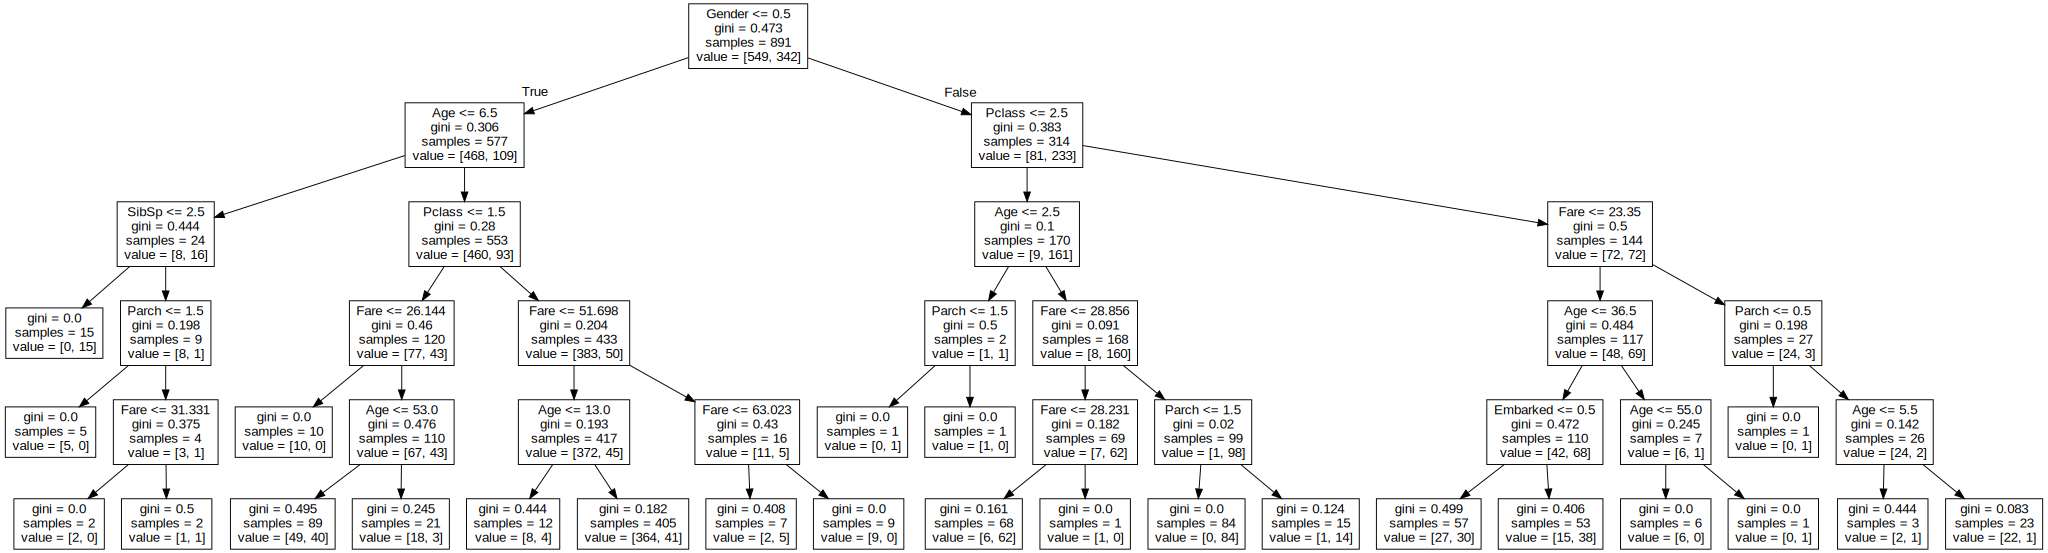

In [ ]:
import graphviz
generalized_tree = tree.DecisionTreeClassifier(
        random_state = 1,
        max_depth = 5,
        min_samples_split=2
)

generalized_tree_ = generalized_tree.fit(features,target)

print("Generalized tree score: ", generalized_tree_.score(features,target))




dot_data=tree.export_graphviz(generalized_tree_,feature_names=data_features_names,out_file=None)
graph = graphviz.Source(dot_data)
graph

### Precision
How many from the predicted results are relevant?

$\begin{equation}
precision =  \frac{True Positive}{True Positive + False Positive}
\end{equation}$



In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.7722772277227723

### Recall
How many relevant items were selected?

$\begin{equation}
recall =  \frac{True Positive}{True Positive + False Negative}
\end{equation}$



In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.7027027027027027